### Company Background
Nearly New Nautical is a website that allows users to advertise their used boats for sale. The
marketing team is preparing a weekly newsletter for boat owners. The newsletter is designed
to help sellers to get more views of their boat, as well as stay on top of market trends. The
Head of Marketing has laid out an ambitious goal of increasing the number of readers by 75%
this year

They would like you to tell them:
<br>
● Is it the most expensive boats that get the most views?
<br>
● Are there common features among the most viewed boats?

The presentation should include:
<br>
● An overview of the project and business goals
<br>
● Your key findings including visualizations to support those findings
<br>
● An overview of how your findings answer the customer questions
<br>
● Your recommendations to the business for future work

In [3]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


### Need to convert price to Euro and change the type from object to int64

In [5]:
df['Currency'] = df['Price'].str[:3]
df['Currency'].unique()

array(['CHF', 'EUR', 'DKK', 'Â£ '], dtype=object)

In [6]:
df['Price_num'] = df['Price'].str[4:]

In [7]:
df['Price_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9888 entries, 0 to 9887
Series name: Price_num
Non-Null Count  Dtype 
--------------  ----- 
9888 non-null   object
dtypes: object(1)
memory usage: 77.4+ KB


In [8]:
df['Price_num'] = df['Price_num'].astype('int64')

In [9]:
def convert(x):
    if x == 'CHF':
        return 1.02
    if x == 'DKK':
    	return 0.13
    if x == 'Â£ ':
    	return 1.15
    else:
        return 1        

In [10]:
df['Price_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9888 entries, 0 to 9887
Series name: Price_num
Non-Null Count  Dtype
--------------  -----
9888 non-null   int64
dtypes: int64(1)
memory usage: 77.4 KB


In [11]:
df['convert_eur'] = df['Price_num'] * df['Currency'].apply(convert)

In [12]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_num,convert_eur
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF,3337,3403.74
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR,3490,3490.00
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF,3770,3845.40
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK,25900,3367.00
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR,3399,3399.00


## Is it the most expensive boats that get the most views?

In [13]:
df[['Boat Type','Number of views last 7 days', 'convert_eur']].sort_values('convert_eur', ascending= False)

,Boat Type,Number of views last 7 days,convert_eur
3325,Mega Yacht,1009,31000000.0
3326,Mega Yacht,304,24050000.0
3327,Mega Yacht,419,23500000.0
3328,Mega Yacht,194,19900000.0
3329,Mega Yacht,110,16900000.0
...,...,...,...
7709,Sport Boat,45,575.0
41,Working Boat,54,195.5
72,"Cabin Boat,Classic",154,0.0
3888,Trawler,71,0.0


In [14]:
df[['Boat Type','Number of views last 7 days', 'convert_eur']].sort_values('Number of views last 7 days', ascending= False)

,Boat Type,Number of views last 7 days,convert_eur
9580,Motor Yacht,3263,15198.0
8723,Hardtop,2432,35700.0
6211,"Bowrider,Motor Yacht,Sport Boat",2261,128418.0
3700,Hardtop,2154,949000.0
308,Sport Boat,2026,20298.0
...,...,...,...
7458,Center console boat,18,62800.0
3529,Motor Yacht,18,1500000.0
2517,Hardtop,18,34442.5
7800,Center console boat,15,53900.0


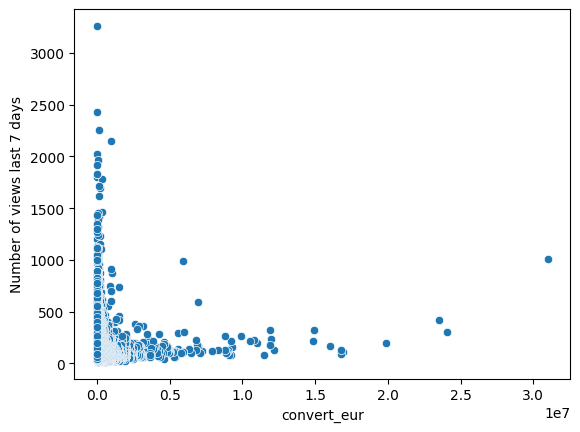

In [15]:
import seaborn as sns
sns.scatterplot(x='convert_eur', y='Number of views last 7 days', data=df);

### Conclusion: We can easily see the most expensive boats didn't get the most views

## Are there common features among the most viewed boats?

In [24]:
df.sort_values('Number of views last 7 days', ascending=False).head(20)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_num,convert_eur
9580,CHF 14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland,3263,CHF,14900,15198.00
8723,CHF 35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland,2432,CHF,35000,35700.00
6211,CHF 125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland,2261,CHF,125900,128418.00
3700,EUR 949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt,2154,EUR,949000,949000.00
308,CHF 19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland,2026,CHF,19900,20298.00
894,CHF 48500,Cabin Boat,Viper power boats,"Used boat,Unleaded",2014,6.65,2.30,GRP,Switzerland,1970,CHF,48500,49470.00
9878,CHF 4999,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland,1917,CHF,4999,5098.98
8684,CHF 36000,Sport Boat,Correct Craft power boats,"Used boat,Unleaded",2005,6.40,2.31,GRP,Switzerland,1834,CHF,36000,36720.00
9843,CHF 6500,Sport Boat,Baha power boats,"Used boat,Unleaded",1995,6.80,2.38,GRP,Thun,1831,CHF,6500,6630.00
35,CHF 3800,Cabin Boat,Draco power boats,"Used boat,Unleaded",1980,6.20,2.45,GRP,Switzerland,1804,CHF,3800,3876.00


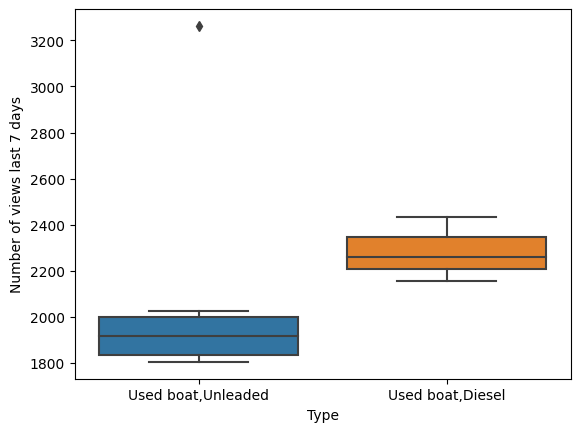

In [17]:
sns.boxplot(x='Type', y='Number of views last 7 days', data= df[['Boat Type','Manufacturer','Type','Year Built','Length','Width','Material','Location','Number of views last 7 days']].sort_values('Number of views last 7 days', ascending=False).head(10));

<AxesSubplot:xlabel='Location', ylabel='Number of views last 7 days'>

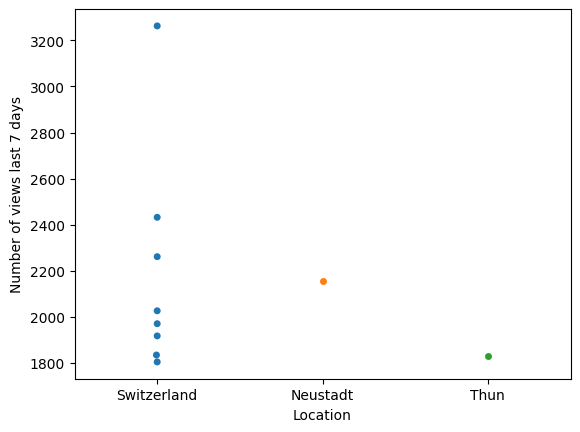

In [18]:
sns.swarmplot(x='Location', y='Number of views last 7 days', data= df[['Boat Type','Manufacturer','Type','Year Built','Length','Width','Material','Location','Number of views last 7 days']].sort_values('Number of views last 7 days', ascending=False).head(10))

### Conclusion: 
#### 1. top 5 most viewed boat are used boat
#### 2. 4 of the top 5 most viewed boat are located in Switzerland
#### 3. top5 most viewed boat have over 200 view in the last 7 days

In [19]:
df[['Boat Type','Manufacturer','Type','Year Built','Length','Width','Material','Location','Number of views last 7 days']].sort_values('Number of views last 7 days', ascending=True).head(10)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
3982,Motor Yacht,Dominator power boats,"Used boat,Diesel",2003,20.30,5.50,GRP,Croatia,13
7800,Center console boat,BÃ©nÃ©teau power boats,"new boat from stock,Unleaded",2020,6.41,2.45,PVC,France,15
3529,Motor Yacht,NaN,"Used boat,Diesel",2007,26.30,6.35,GRP,Italy,18
2517,Hardtop,Jeanneau power boats,"new boat from stock,Diesel",2018,10.36,3.05,PVC,United,18
7458,Center console boat,BÃ©nÃ©teau power boats,"new boat from stock,Unleaded",2020,6.41,2.48,PVC,France,18
1981,Motor Yacht,NaN,"Used boat,Diesel",2001,12.80,3.76,NaN,Italy,19
6151,Sport Boat,Tiara power boats,"Used boat,Diesel",2005,9.37,3.45,GRP,Italy,19
5161,Flybridge,Carnevali power boats,"Used boat,Diesel",2001,14.90,4.70,GRP,Italy,19
4474,Motor Yacht,Dalla Pieta power boats,Used boat,2007,18.51,4.94,GRP,Croatia,19
7138,Flybridge,Bertram Yacht power boats,"Used boat,Unleaded",1985,9.99,3.81,GRP,France,19


In [20]:
df['Location'].value_counts().head(10)

Germany        1914
Italy          1793
France         1229
Switzerland    1112
Netherlands    1056
Croatia         811
Spain           702
United          238
Denmark         172
Portugal        135
Name: Location, dtype: int64

In [30]:
df.groupby('Location')['Number of views last 7 days'].agg(['max','mean','count']).round(0).sort_values('max', ascending=False).head(10)

,max,mean,count
Location,,,
Switzerland,3263,337.0,1112
Neustadt,2154,2154.0,1
Thun,1831,1831.0,1
Germany,1700,150.0,1914
Croatia,1461,117.0,811
Lake,1236,584.0,16
Austria,1128,187.0,88
Thailand,1119,422.0,3
"ZÃ¼richse,",1017,1017.0,1


## Recommendations
- Promote the boats are listed in Switzerland
- Promote the condition of the boats which are used and unleaded
- In order to increase the number of readers by 75% this year, we need to implement the steps below.
   - know the number of readers now
   - set the monthly goal till the end of this year 
   - reach out the readers to see if they subscribe other newsletters and we could target more readers from there 